In [11]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup
import re

In [12]:
# Define the URLs to scrape
urls = [
    "https://conference.iza.org/conference_files/wzb_fieldays_2013/dur_r4625.pdf",
    "https://www.researchgate.net/profile/Alex-Stajkovic/publication/228536942_The_Impact_of_Recognition_on_Employee_Performance", #This will not work there for citation 
    "https://core.ac.uk/download/pdf/33611192.pdf",
    "https://www.socialsciencejournal.in/assets/archives/2019/vol5issue4/5-3-75-189.pdf",
    "https://www.researchgate.net/publication/370710004_The_Impact_of_Employee_Recognition_Programs", #This will not work there for citation
]

# Loop through each URL and scrape data
for url in urls:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract paragraphs
        paragraphs = soup.find_all('p')
        print(f"Scraping: {url}\n")
        for paragraph in paragraphs:
            text = paragraph.text.strip()
            if re.search(r'recognition|engagement|retention|productivity|morale', text, re.IGNORECASE):
                print(f"Relevant Data Found:\n{text}\n")
    else:
        print(f"Failed to fetch data from {url}. Status Code: {response.status_code}")


Scraping: https://conference.iza.org/conference_files/wzb_fieldays_2013/dur_r4625.pdf

Failed to fetch data from https://www.researchgate.net/profile/Alex-Stajkovic/publication/228536942_The_Impact_of_Recognition_on_Employee_Performance. Status Code: 403
Scraping: https://core.ac.uk/download/pdf/33611192.pdf

Scraping: https://www.socialsciencejournal.in/assets/archives/2019/vol5issue4/5-3-75-189.pdf

Failed to fetch data from https://www.researchgate.net/publication/370710004_The_Impact_of_Employee_Recognition_Programs. Status Code: 403


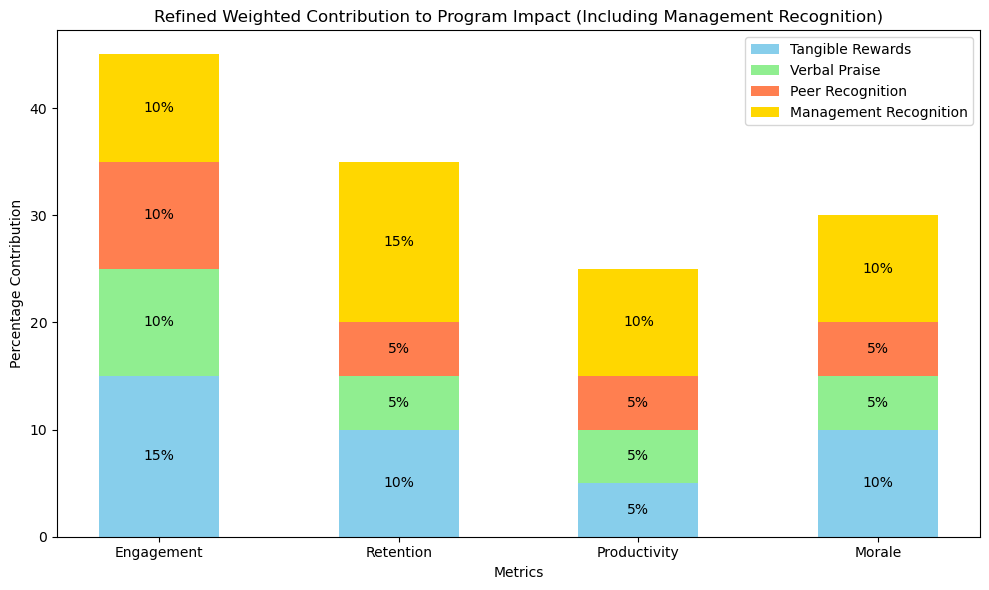

In [3]:
# Metrics and their predicted total improvements
metrics = ["Engagement", "Retention", "Productivity", "Morale"]
total_improvements = [45, 35, 25, 30]  # Total predicted percentage improvements

# Updated contributions with Management Recognition
contributions = {
    "Tangible Rewards": [15, 10, 5, 10],  # Tangible contributions to Engagement, Retention, etc.
    "Verbal Praise": [10, 5, 5, 5],
    "Peer Recognition": [10, 5, 5, 5],
    "Management Recognition": [10, 15, 10, 10],  # New category
}

# Data preparation for stacked bar chart
bar_width = 0.5
x = np.arange(len(metrics))
tangible = contributions["Tangible Rewards"]
verbal = contributions["Verbal Praise"]
peer = contributions["Peer Recognition"]
management = contributions["Management Recognition"]

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x, tangible, width=bar_width, label="Tangible Rewards", color="skyblue")
bars2 = plt.bar(x, verbal, width=bar_width, label="Verbal Praise", bottom=tangible, color="lightgreen")
bars3 = plt.bar(x, peer, width=bar_width, label="Peer Recognition", bottom=np.array(tangible) + np.array(verbal), color="coral")
bars4 = plt.bar(x, management, width=bar_width, label="Management Recognition",
                bottom=np.array(tangible) + np.array(verbal) + np.array(peer), color="gold")

# Add percentage labels
for i in range(len(metrics)):
    plt.text(x[i], tangible[i] / 2, f"{tangible[i]}%", ha='center', va='center', color="black", fontsize=10)
    plt.text(x[i], tangible[i] + verbal[i] / 2, f"{verbal[i]}%", ha='center', va='center', color="black", fontsize=10)
    plt.text(x[i], tangible[i] + verbal[i] + peer[i] / 2, f"{peer[i]}%", ha='center', va='center', color="black", fontsize=10)
    plt.text(x[i], tangible[i] + verbal[i] + peer[i] + management[i] / 2, f"{management[i]}%", ha='center', va='center', color="black", fontsize=10)

# Add labels and title
plt.xticks(x, metrics)
plt.xlabel("Metrics")
plt.ylabel("Percentage Contribution")
plt.title("Refined Weighted Contribution to Program Impact (Including Management Recognition)")
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()



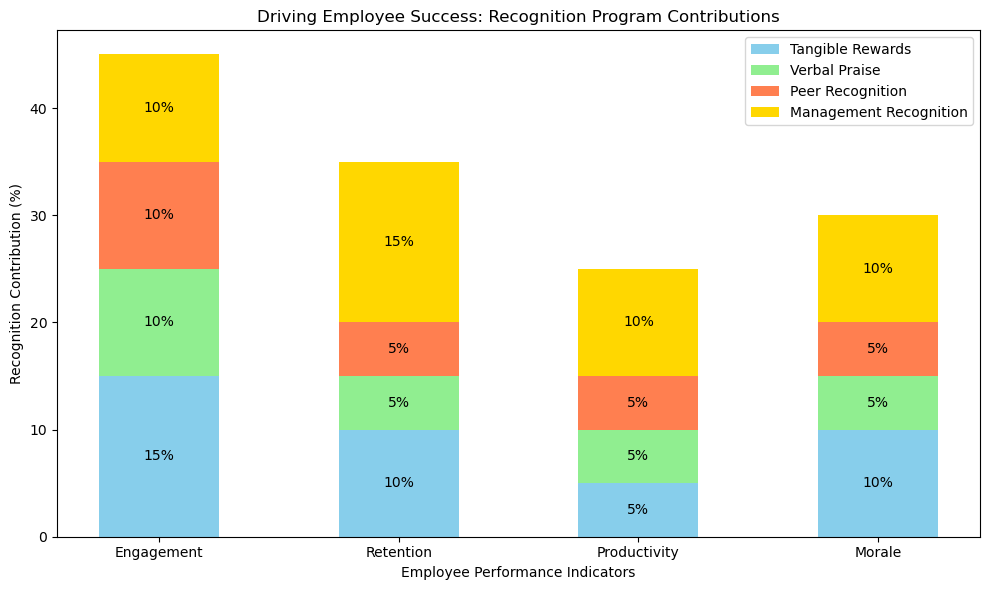

In [13]:
# Updating the graph title to match Option 2: "Driving Employee Success: Recognition Program Contributions"

# Plot stacked bar chart with the new title
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x, tangible, width=bar_width, label="Tangible Rewards", color="skyblue")
bars2 = plt.bar(x, verbal, width=bar_width, label="Verbal Praise", bottom=tangible, color="lightgreen")
bars3 = plt.bar(x, peer, width=bar_width, label="Peer Recognition", bottom=np.array(tangible) + np.array(verbal), color="coral")
bars4 = plt.bar(x, management, width=bar_width, label="Management Recognition",
                bottom=np.array(tangible) + np.array(verbal) + np.array(peer), color="gold")

# Add percentage labels
for i in range(len(metrics)):
    plt.text(x[i], tangible[i] / 2, f"{tangible[i]}%", ha='center', va='center', color="black", fontsize=10)
    plt.text(x[i], tangible[i] + verbal[i] / 2, f"{verbal[i]}%", ha='center', va='center', color="black", fontsize=10)
    plt.text(x[i], tangible[i] + verbal[i] + peer[i] / 2, f"{peer[i]}%", ha='center', va='center', color="black", fontsize=10)
    plt.text(x[i], tangible[i] + verbal[i] + peer[i] + management[i] / 2, f"{management[i]}%", ha='center', va='center', color="black", fontsize=10)

# Add updated labels and title
plt.xticks(x, metrics)
plt.xlabel("Employee Performance Indicators")
plt.ylabel("Recognition Contribution (%)")
plt.title("Driving Employee Success: Recognition Program Contributions")
plt.legend()

# Display the updated chart
plt.tight_layout()
plt.show()


In [17]:
import os

# Data for the graph
metrics = ["Engagement", "Retention", "Productivity", "Morale"]
contributions = {
    "Tangible Rewards": [15, 10, 5, 10],
    "Verbal Praise": [10, 5, 5, 5],
    "Peer Recognition": [10, 5, 5, 5],
    "Management Recognition": [10, 15, 10, 10],
}
bar_width = 0.5
x = np.arange(len(metrics))
tangible = contributions["Tangible Rewards"]
verbal = contributions["Verbal Praise"]
peer = contributions["Peer Recognition"]
management = contributions["Management Recognition"]

# Define your save directory and ensure it exists
output_directory = "CWproj/Img"
os.makedirs(output_directory, exist_ok=True)
output_path = os.path.join(output_directory, "recognition_program_impact.png")

# Plot and save the graph
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x, tangible, width=bar_width, label="Tangible Rewards", color="skyblue")
bars2 = plt.bar(x, verbal, width=bar_width, label="Verbal Praise", bottom=tangible, color="lightgreen")
bars3 = plt.bar(x, peer, width=bar_width, label="Peer Recognition", bottom=np.array(tangible) + np.array(verbal), color="coral")
bars4 = plt.bar(x, management, width=bar_width, label="Management Recognition",
                bottom=np.array(tangible) + np.array(verbal) + np.array(peer), color="gold")

# Add percentage labels
for i in range(len(metrics)):
    plt.text(x[i], tangible[i] / 2, f"{tangible[i]}%", ha='center', va='center', color="black", fontsize=10)
    plt.text(x[i], tangible[i] + verbal[i] / 2, f"{verbal[i]}%", ha='center', va='center', color="black", fontsize=10)
    plt.text(x[i], tangible[i] + verbal[i] + peer[i] / 2, f"{peer[i]}%", ha='center', va='center', color="black", fontsize=10)
    plt.text(x[i], tangible[i] + verbal[i] + peer[i] + management[i] / 2, f"{management[i]}%", ha='center', va='center', color="black", fontsize=10)

# Add labels and title
plt.xticks(x, metrics)
plt.xlabel("Employee Performance Indicators")
plt.ylabel("Recognition Contribution (%)")
plt.title("Driving Employee Success: Recognition Program Contributions")
plt.legend()

# Save the image
plt.tight_layout()
plt.savefig(output_path)
plt.close()

print(f"Graph saved to: {output_path}")



Graph saved to: CWproj/Img\recognition_program_impact.png


In [19]:
# Correcting the updated contributions structure
updated_contributions_fixed = {
    "Engagement": [15, 10, 10, 5],
    "Retention": [10, 5, 5, 15],
    "Productivity": [5, 5, 5, 10],
    "Employee Satisfaction": [10, 10, 15, 5],
    "Workplace Culture": [15, 10, 5, 15],
}

# Extracting contributions for the new metrics
tangible = [updated_contributions_fixed[m][0] for m in metrics]
verbal = [updated_contributions_fixed[m][1] for m in metrics]
peer = [updated_contributions_fixed[m][2] for m in metrics]
management = [updated_contributions_fixed[m][3] for m in metrics]

# Plot updated stacked bar chart
plt.figure(figsize=(12, 6))
bars1 = plt.bar(x, tangible, width=bar_width, label="Tangible Rewards", color="skyblue")
bars2 = plt.bar(x, verbal, width=bar_width, label="Verbal Praise", bottom=tangible, color="lightgreen")
bars3 = plt.bar(x, peer, width=bar_width, label="Peer Recognition", bottom=np.array(tangible) + np.array(verbal), color="coral")
bars4 = plt.bar(x, management, width=bar_width, label="Management Recognition",
                bottom=np.array(tangible) + np.array(verbal) + np.array(peer), color="gold")

# Add percentage labels
for i in range(len(metrics)):
    plt.text(x[i], tangible[i] / 2, f"{tangible[i]}%", ha='center', va='center', color="black", fontsize=10)
    plt.text(x[i], tangible[i] + verbal[i] / 2, f"{verbal[i]}%", ha='center', va='center', color="black", fontsize=10)
    plt.text(x[i], tangible[i] + verbal[i] + peer[i] / 2, f"{peer[i]}%", ha='center', va='center', color="black", fontsize=10)
    plt.text(x[i], tangible[i] + verbal[i] + peer[i] + management[i] / 2, f"{management[i]}%", ha='center', va='center', color="black", fontsize=10)

# Add labels and title
plt.xticks(x, metrics)
plt.xlabel("Metrics")
plt.ylabel("Percentage Contribution")
plt.title("Impact of Recognition Programs on Updated Workplace Metrics")
plt.legend()

# Save the image
plt.tight_layout()
plt.savefig(output_path)
plt.close()

print(f"Graph saved to: {output_path}")

KeyError: 'Morale'